## 1. 马尔可夫过程及其概率分布

### **马尔可夫性/无后效性**

过程（或系统）在时刻$t_0$所处的状态为已知的条件下，过程在时刻$t>t_0$所处状态的条件分布与过程在时刻$t_0$之前所处的状态无关。

**定义**

随机过程$\{X(t),t\in T\}$的状态空间为$I$。对任意n个时刻$t_1<t_2<...<t_n, n\ge 3,t_i\in T$，在条件$X(t_i)=x_i,x_i \in I, i=1,2,..,n-1$下，$X(t_n)$的条件分布函数恰等于在条件$X(t_{n-1})=x_{n-1}$下$X(t_n)$的条件分布函数，即
$$
P\{X(t_n) \le x_n \lvert X(t_1)=x_1,X(t_2)=x_2,...,X(t_{n-1})=x_{n-1} \}\\
= P\{X(t_n) \le x_n \lvert X(t_{n-1})=t_{n-1}\}, x_n \in R
$$
或写成
$$
F_{t_n \lvert t_1...t_{n-1}}(x_n,t_n \lvert x_1,x_2,...,x_{n-1};t_1,t_2,...,t_{n-1})=F_{t_n \lvert t_{n-1}}(x_n,t_n \lvert x_{n-1};t_{n-1})
$$
则称过程具有马尔可夫性或无后效性，并称此过程为**马尔可夫过程**。

泊松过程是时间连续、状态离散的马氏过程；维纳过程是时间、状态都连续的马氏过程。

### 转移概率

时间和状态都是离散的马尔可夫过程称为**马尔可夫链**，简称马式链。

对任意正整数$n,r$和$0\le t_1<t_2<...<t_r<m;t_i,m,n+m \in T_1$，有
$$
P\{X_{m+n}=a_j \lvert X_{t_1}=a_{t_1}, X_{t_2}=a_{t_2}, ..., X_{t_r}=a_{t_r}, X_{m}=a_{i}, \} \\
= P\{X_{m+n}=a_j \lvert X_m=a_i\}
$$
其中$a_i\in I$，记上式右端为$P_{ij}(m,m+n)$，称条件概率
$$
P_{ij}(m,m+n)= P\{X_{m+n}=a_j \lvert X_m=a_i\}
$$
为马式链在时刻$m$处于状态$a_i$条件下，在时刻$m+n$转移到状态$a_j$的**转移概率**。

由于从时刻$m$处于状态$a_i$条件下，到时刻$m+n$必然转移到某一个状态，所以
$$
\sum_{j=1}^{+\infty}P_{ij}(m,m+n)=1,i=1,2,...
$$

由转移概率组成的矩阵$P_{ij}(m,m+n)=(P_{ij}(m,m+n))$称为马式链的**转移概率矩阵**。此矩阵每一行元之和等于1。

当转移概率只与$i,j$及时间间距$n$有关时，称此转移概率具有**平稳性**，同时也称此链是**齐次的**或**时齐的**。记
$$
P_{ij}(m,m+n)=P_{ij}(n)
$$

**马氏链为齐次的情况下**，$P_{ij}(n)$称为马式链的**n步转移概率**，$P(n)=(P_{ij}(n))$为**n步转移概率矩阵**。

**一步转移概率**
$$
p_{ij}=P_{ij}(1)=P\{X_{m+1}=a_j \lvert X_m=a_i\}
$$

**一步转移概率矩阵**
![Snipaste_2019-10-13_22-18-09.png](Snipaste_2019-10-13_22-18-09.png)


#### 例子（一维随机游动）

设一醉汉Q（或看作一随机游动的质点），在如图所示的直线点集$I=\{1,2,3,4,5\}$上作随机游动，且仅在1秒、2秒等时刻发生游动。游动的概率规则是：如果Q现在位于点i(1<i<5)，则下一时刻各以1/3的概率向左或向右移动一格，或以1/3的概率还留在原点；如果Q现在位于1(或5)这点上，则下一时刻就以概率1移动到2(或4)这一点上。1和5这两点称为反射壁。上面这种游动称为带有两个反射壁的随机游动。
![Snipaste_2019-10-14_00-42-21.png](Snipaste_2019-10-14_00-42-21.png)

若以$X_n$表示时刻n时Q的位置，那么$X_n$是一随机过程，当$X_n=i$时为已知时，$X_{n+1}$所处的状态的概率分布只与$X_n=i$有关，所以$X_n$是一马氏链，而且还是齐次的。它的一步转移概率矩阵为
$$
P=\left(
  \begin{array}{ccccc}
    0 &1 &0 &0 &0 \\
    1/3 &1/3 &1/3 &0 &0 \\
    0 &1/3 &1/3 &1/3 &0 \\
    0 &0 &1/3 &1/3 &1/3 \\
    0 &0 &0 &1 &0 \\
  \end{array}
\right)
$$

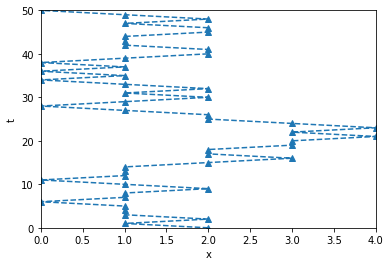

In [2]:
import numpy as np
from matplotlib import pyplot as plt 

class Markov:
    def __init__(self, p, x0):
        self.P = p
        self.xn = x0
        self.n = 0
        # 辅助计算转移概率的矩阵
        self.F = p.cumsum(axis=1)
    
    def next(self):
        # 随机产生一个 (0,1) 间的数，用于确定随机游动的下一步
        v = 0
        while not v:
            v = np.random.random_sample()
        
        xn = 0
        for f in self.F[self.xn]:
            if v < f:
                break
            else:
                xn += 1
        self.xn = xn
        self.n += 1
        return self.xn

# 一步转移概率矩阵
P = np.array([
    [0,1,0,0,0],
    [1/3,1/3,1/3,0,0],
    [0,1/3,1/3,1/3,0],
    [0,0,1/3,1/3,1/3],
    [0,0,0,1,0]
])

# 初始位置x=2
x = [2]
markov = Markov(P, x[0])

t=np.arange(51)
for i in t[1:]:
    x.append(markov.next())

# 画图
fig = plt.figure()
plt.plot(x, t, '--^')
plt.xlabel('x')
plt.xlim([0,4])
plt.ylabel('t')
plt.ylim([0,50])

plt.show()

## 2. 多步转移概率的确定

### C-K方程
$$
P_{ij}(u+v)=\sum_{k=1}^{+\infty}P_{ik}(u)P_{kj}(v),i,j=1,2,...
$$

“从时刻s所处状态$a_i$，即$X(s)=a_i$出发，经过时段$u+v$转移到状态$a_j$，即$X(s+u+v)=a_j$”这一事件可以分解成“从$X(x)=a_i$出发，先经时段$u$转移到中间状态$a_k(k=1,2,...)$，再从$a_k$经时段$v$转移到状态$a_j$”这样一些事件的和事件。

矩阵形式:
$$
P(u+v)=P(u)P(v)
$$

令$u=1,v=n-1$，得递推关系：
$$
P(n)=P(1)P(n-1)=PP(n-1) \\
P(n) = P^n
$$

齐次马式链的有限维分布律完全由初始分布和一步转移概率所确定。

## 3. 遍历性

对于一般的两个状态的马氏链，当$0<a,b<1$时，记$P_{ij}$的极限
$$
\lim_{n \to +\infty}P_{00}(n)=\lim_{n \to +\infty}P_{10}(n)=\frac{b}{a+b}=\pi_0 \\
\lim_{n \to +\infty}P_{01}(n)=\lim_{n \to +\infty}P_{11}(n)=\frac{a}{a+b}=\pi_1 \\
\pi_0+\pi_1=1
$$

该极限表明：不管链在某一刻从什么状态（i）出发，经过长时间的转移，到达状态j的概率都趋近于$\pi_j$，这就是所谓的遍历性。

如果对于齐次马氏链的所有状态$a_i,a_j\in I$，转移概率$P_{ij}(n)$存在极限
$$
\lim_{n\to\infty}P_{ij}(n)=\pi_j（不依赖于i）
$$
或
$$
P(n)=P^n \xrightarrow[(n\to+\infty)]{} \left(
  \begin{array}{ccccc}
    \pi_1 & \pi_2 &\dots &\pi_j &\dots \\
    \pi_1 & \pi_2 &\dots &\pi_j &\dots \\
    \vdots &\vdots &  &\vdots & \\
    \pi_1 & \pi_2 &\dots &\pi_j &\dots \\
    \vdots &\vdots &  &\vdots & \\
  \end{array}
\right)
$$
称此链具有**遍历性**。

又若$\sum_{j}^{}\pi_j=1$，则同时称$\pi=(\pi_1,\pi_2,\dots)$称为链的**极限分布**。

### 遍历性的充分条件

**定理** 设齐次马氏链$\{X_n,n\ge1\}$的状态空间为$I=\{a_i,a_2,\dots,a_N\}$，$P$是它的一步转移概率矩阵，如果存在正整数$m$，使对任意的$a_i,a_j\in I$都有
$$
P_{ij}(m)>0,\; i,j=1,2,\dots,N
$$
则此链具有遍历性，且有极限分布$\pi=(\pi_1,\pi_2,\dots,\pi_N)$，它是方程组
$$
\pi=\pi P 或即\pi_j=\sum_{i=1}^{N}\pi_ip_{ij},\; j=1,2,\dots,N
$$
的满足条件
$$
\pi_j > 0,\sum_{j=1}^{N}\pi_j=1
$$
的唯一解。

在定理条件下，马氏链的极限分布又是**平稳分布**。即，若初始分布$P(0)=\pi$，则链在任一时刻$p(0)=\pi$的分布永远与$\pi$一致。
$$
p(n)=p(0)P(n)=\pi P^n=\pi P^{n-1}=\dots=\pi P=\pi
$$

习题：
![image.png](Snipaste_2019-10-14_01-59-17.png)

解：

(1) 
$$
\begin{aligned}
P\{X_0=1,X_1=2,X_2=2\} &=P\{X_0=1\} \times P\{X_1=2 \lvert X_0=1 \} \times P\{X_2=2 \lvert X_0=1,X_1=2 \} \\
 &=P\{X_0=1\} P\{X_1=2 \lvert X_0=1 \} P\{X_2=2 \lvert X_1=2 \} \\
 &=p_{10}p_{12}p_{22}=\frac{1}{4} \times \frac{3}{4} \times \frac{1}{3}=\frac{1}{16}
\end{aligned}
$$

(2)
$$
\begin{aligned}
P\{X_1=2,X_2=2 \lvert X_0=1\} &= P\{X_0=1,X_1=2,X_2=2\} \div P\{X_0=1 \} \\
 &=p_{12}p_{22}
\end{aligned}
$$

(3)
由C-K方程可得：
$$
\begin{aligned}
p_{12}(2) &= p_{11}p_{12} + p_{12}p_{22} + p_{13}p_{32} \\
 &=\frac{1}{4} \times \frac{3}{4} + \frac{3}{4} \times \frac{1}{3} + 0 \times \frac{1}{4} \\
 &=\frac{7}{16}
\end{aligned}
$$

(4)
留作习题